Con esta primera celda instalamos todas las bibliotecas que necesitamos para adquirir y trabajar con la información y los datos que vamos a necesitar.
- Bs4 es el paquete que contiene las herramientas para analizar HTML, podemos pensarlo como una biblioteca.
- BeautifulSopu es una clave dentro de bs4 que sirve para leer, navegar e interpretar código HTML. Gracias a ello podemos buscar etiquetas propias de html como table, tr y td.
- BeutifulSoup nos ordena el texto para que podamos leerlo mejor. Sin esta herramienta el scraping sería casi imposible.
- Yfinance sirve para descargar datos financieros históricos en este caso de Tesla.

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt

A continuación trabajamos con los datos históricos de acciones de Tesla. Usamos yfinance para ello de esta manera nos estamos conectado de yahoo finance descargando los datos históricos de la acción y noos devolverá un dataframe de pandas.

In [5]:
tesla = yf.Ticker("TSLA")
tesla_data= tesla.history(period="max")

Reseteamos el índice para que la fehca pase de ser un índice a ser una columna. Antes se vería con esta estructura:
- Index: Date.
Después de resetear el índice:
- Column: Date.
Esto debe hacerse para poder trabajar directamente con la fecha una vez creado el Datafream (df["Date"]).
- También nor permite filtrar por fecha así como graficar.

In [6]:
tesla_data.reset_index(inplace=True)

In [7]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Empezamos con el Web Scraping de ingresos de tesla.
1. Creamos la variable url con la dirección de la que queremos obtener la información. Utilizamos para ello la sección Financials de Yahoo Financce que muestra los ingresos en forma de tabla HTML.
2. Creamos una variable HTML de datos utilizando la librería request con el atributo .text que nos devuelve el HTML en formato de texto.

Vamos a utilizar un header que envía una petición HTTP para llamar a la puerta del servidor.



In [8]:
#Headers para simular un navegador y evitar bloqueos del servidor.
HEADERS = {'User-Agent': 'Mozilla/5.0'}
url =  "https://finance.yahoo.com/quote/TSLA/financials"
response = requests.get(url, headers=HEADERS)
html_data = response.text

Convertimos el HTML en una estructura que podemos navegar y analizar fácilmente utilizando BeautifulSoup. Como decíamos antes, así podemos buscar etiquetas como table, tr y td que son propias de HTML.

In [9]:
soup = BeautifulSoup(html_data, 'html.parser')

Buscamos las tablas HTML que estén en la página generando variables con ese fin. Seleccionamos la que contiene ingresos.

In [10]:
tables = soup.find_all("table")
len (tables)

if len(tables)>0:
    table = tables [0]
else:
    print ("No se encontraron tablas")

No se encontraron tablas


No se puede scrapaear porque la página Yahoo Finance no tiene tablas en html. Actualmente carga los datos financieros a través de Java Script por lo que las tablas de ingresos no están disponibles en HTML. Para mantener el objetivo, vamos a utilizar los ingresos proporcionados por yfinance. Rehacemos todo el ejercicio con este fin.

In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#Preparación del entorno.

In [12]:
#Descarga de los datos.

testla = yf.Ticker ("TSLA")
tesla_data = tesla.history (period="max")

In [13]:
#Reseteamos el índice.

tesla_data.reset_index(inplace=True)

In [14]:
tesla_data.head()  #Mostramos las primeras filas.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
#Como yahoo finance ya no expone tablas de ingresos en HTML usamos yfinance que nos proporciona los datos de manera estructurada.
#Con esto obtenemos el income statement.
tesla_revenue = tesla.financials

In [16]:
#Limpiamos los datos que queremos obtener.
tesla_revenue = tesla_revenue.T.reset_index()
tesla_revenue = tesla_revenue[["index", "Total Revenue"]]
tesla_revenue.columns = ["Date", "Revenue"]
#Mostramos las últimas filas.
tesla_revenue.tail()

,Date,Revenue
0,2024-12-31,9.769000e+10
1,2023-12-31,9.677300e+10
2,2022-12-31,8.146200e+10
3,2021-12-31,5.382300e+10
4,2020-12-31,NaN


A continuación vamos a trabajar los datos GameStop para conocer los datos de la acción de Tesla y los datos de ingresos (empresa). Gme_revenue son los ingresos reales de la empresa.
gme_data es un Data Frame con la evolución histórica de la acción de GameStop.

In [17]:
gme = yf.Ticker("GME") #Utilización de la bibiblioteca yfinance.
gme_data = gme.history(period="max") #Búsqueda de los datos históricos.
gme_data.reset_index(inplace=True) #Resetear el índice.
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


gme_revenue representa los ingresos reales de la empresa obtenidos de sus estados financiero. Utilizamos yfinance para que actúe como puente estructurado a Yahoo Finance.

In [18]:
gme_revenue = gme.financials
gme_revenue = gme_revenue .T.reset_index()
gme_revenue = gme_revenue[["index", "Total Revenue"]]
gme_revenue.columns = ["Date", "Revenue"]

In [19]:
gme_revenue.tail()

,Date,Revenue
0,2025-01-31,3.823000e+09
1,2024-01-31,5.272800e+09
2,2023-01-31,5.927200e+09
3,2022-01-31,6.010700e+09
4,2021-01-31,NaN


Vamos a realizar gráficos de TESLA.

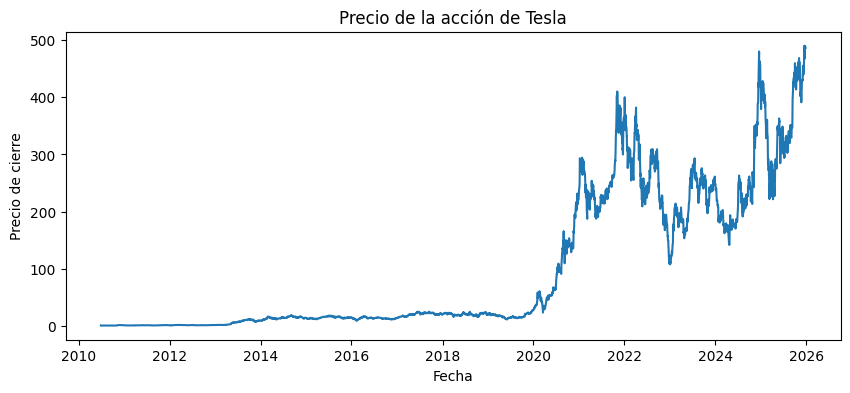

In [20]:
#Precio de la acción en Tesla.
plt.figure(figsize=(10,4))
plt.plot(tesla_data["Date"], tesla_data["Close"])
plt.title("Precio de la acción de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()


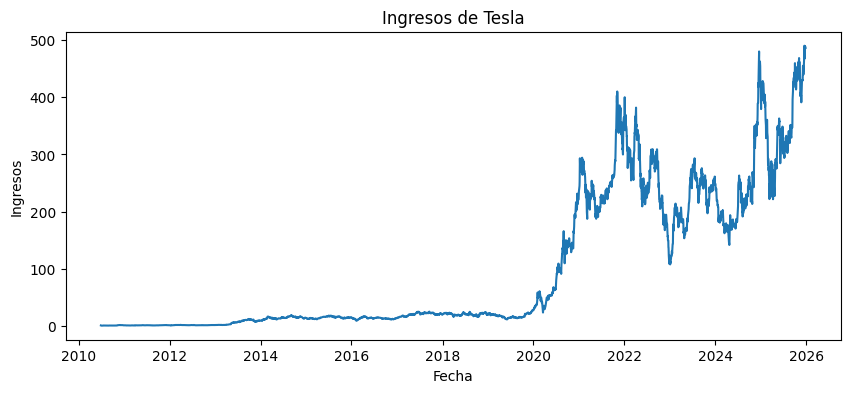

In [21]:
#Ingresos de Tesla.
plt.figure(figsize=(10,4))
plt.plot(tesla_data["Date"], tesla_data["Close"])
plt.title("Ingresos de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.show()

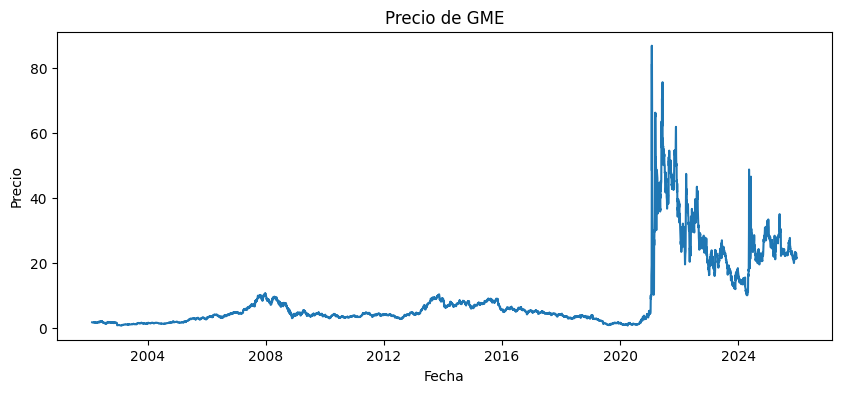

In [22]:
plt.figure(figsize=(10,4))
plt.plot(gme_data["Date"], gme_data["Close"])
plt.title("Precio de GME")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

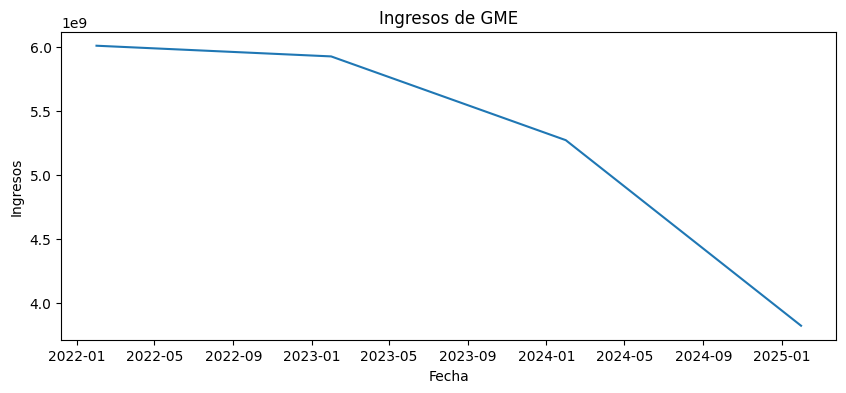

In [23]:
plt.figure(figsize=(10,4))
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"])
plt.title("Ingresos de GME")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.show()


In [24]:
gme_data.loc[gme_data["Date"] == "2002-02-13", "Close"]


0    1.691667
Name: Close, dtype: float64